In [1]:
import glob
import os
import re

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.gridspec import GridSpec

In [2]:
# --- FUNCTION to preprocess .txt files for consistent delimiters


def preprocess_txt(file_path):
    data = []  # Initialize a list to store the processed data

    # Initialize a flag to determine if we are reading the header
    is_header = True

    # Read the file line by line and process the data
    with open(file_path) as file:
        for line in file:
            line = line.strip()  # Remove leading/trailing whitespace
            if is_header:
                # Split the first line into column names
                column_names = re.split(r"\s+", line)
                is_header = False
            else:
                # Split the other lines into data values
                values = re.split(r"\s+", line)
                data.append(values)

    # Create a DataFrame with the processed data and set column names
    df = pd.DataFrame(data, columns=column_names)
    # return
    return df

In [3]:
# --- read in profile data
# profile data have one file per timestep, so we must read each in separately and combine


# where results are stored
# results_path = "example_3-2-lessAcid3_site8"# "example_3-3-15xRadius_site8"
results_path = (
    "example_3-2-deep-shallowGW-highpH_site8"  # "example_3-3-15xRadius_site8"
)
flx_path, prof_path = os.path.join(results_path, "flx"), os.path.join(
    results_path, "prof"
)

# define file name pattern
fn_pref = ["prof_aq"]
fn_ext = ".txt"

# loop through variables
df = pd.DataFrame()  # initialize empty df to store dat
for var in fn_pref:
    # set pattern
    fn_pattern = f"{var}-*{fn_ext}"
    # get list of filenames
    file_paths = glob.glob(f"{prof_path}/{fn_pattern}")
    file_paths_numsOnly = [
        path for path in file_paths if re.search(r"\d", path.split("/")[-1])
    ]
    # read in data and concatenate
    for file_path in file_paths_numsOnly:
        dfi = preprocess_txt(file_path)
        # apply pd.to_numeric to all columns using the "map" method
        dfi = dfi.map(pd.to_numeric)
        # add var
        dfi["var"] = var
        # combine
        df = pd.concat([df, dfi], ignore_index=True)


# sort by time and depth
df = df.sort_values(by=["var", "time", "z"])
df

,z,mg,si,na,ca,al,fe3,k,ph,time,var
180,0.008333,0.001026,0.000032,0.000002,0.000175,2.410782e-07,1.000000e-20,3.695087e-07,8.565283,1.368581,prof_aq
181,0.025000,0.001039,0.000059,0.000004,0.000170,1.304884e-07,1.000000e-20,6.439609e-07,8.577484,1.368581,prof_aq
182,0.041667,0.001046,0.000078,0.000005,0.000165,9.399367e-08,1.000000e-20,8.480218e-07,8.588772,1.368581,prof_aq
183,0.058333,0.001053,0.000097,0.000007,0.000160,7.347536e-08,1.000000e-20,9.861581e-07,8.600832,1.368581,prof_aq
184,0.075000,0.001061,0.000115,0.000009,0.000156,6.045227e-08,1.000000e-20,1.066015e-06,8.613760,1.368581,prof_aq
...,...,...,...,...,...,...,...,...,...,...,...
835,0.925000,0.000135,0.000291,0.000067,0.000223,2.895924e-08,1.000000e-20,3.124101e-06,8.958950,120968.352550,prof_aq
836,0.941667,0.000141,0.000297,0.000069,0.000210,3.089507e-08,1.000000e-20,2.734049e-06,8.995420,120968.352550,prof_aq
837,0.958333,0.000148,0.000303,0.000071,0.000198,3.300610e-08,1.000000e-20,2.358910e-06,9.030416,120968.352550,prof_aq
838,0.975000,0.000159,0.000308,0.000073,0.000186,3.516745e-08,1.000000e-20,2.028849e-06,9.062603,120968.352550,prof_aq


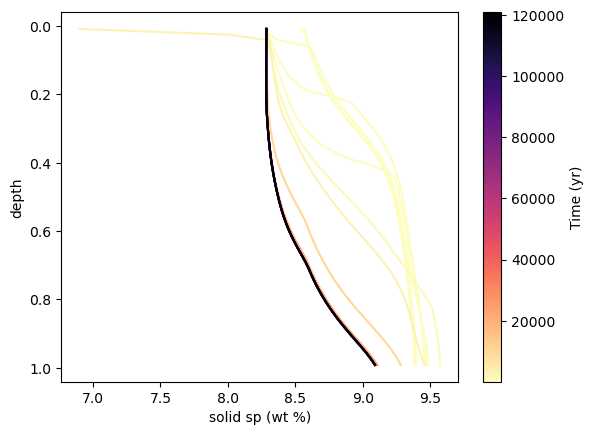

In [4]:
# --- plot depth profile of calcite through time
dfx = df[df["var"] == "prof_aq"]
# Group the DataFrame by the 'time' column
grouped = dfx.groupby("time")

# Create a colormap
cmap = plt.get_cmap("magma")  # Get the colormap
cmap = cmap.reversed()  # flip colormap
# -- no log normalization
norm = plt.Normalize(
    df["time"].min(), df["time"].max()
)  # Normalize time values for colormap
# -- log normalization WIP
# log_time = np.log(df['time'])
# norm = plt.Normalize(log_time.min(), log_time.max())  # Normalize time values for colormap

# Create a plot for each time step
for time, group in grouped:
    color = cmap(norm(time))  # Map time to color using Viridis colormap
    plt.plot(group["ph"], group["z"], color=color, label=None)
    # plt.plot(group['gt'], group['z'], color=color, linestyle='dashed', label=None)

# Add labels and a legend
plt.xlabel("solid sp (wt %)")
plt.ylabel("depth")

# Create a colorbar based on the Viridis colormap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set an empty array for the colorbar data
cbar = plt.colorbar(sm, label="Time (yr)", ax=plt.gca())

# flip y-axis
plt.gca().invert_yaxis()

# Show the plot
plt.show()

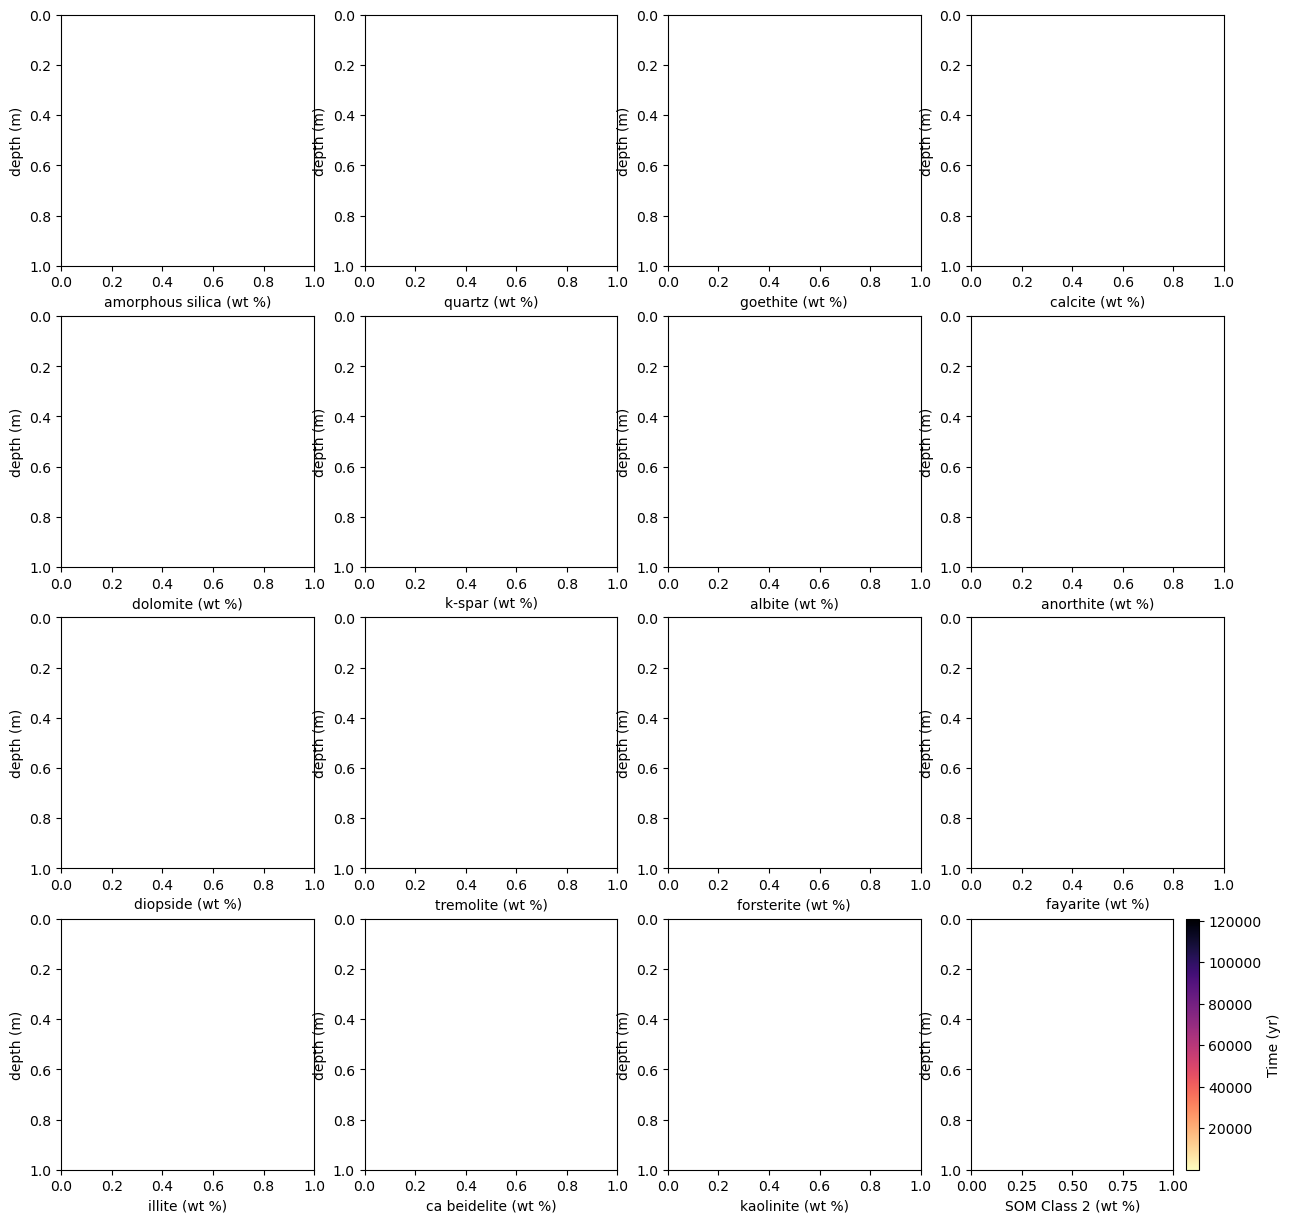

In [5]:
# --- multi-panel plot (pieces of Kanzaki et al., Fig. 8)
dfx = df[df["var"] == "prof_sld(wt%)"]
# Group the DataFrame by the 'time' column
grouped = dfx.groupby("time")

# Create a colormap
cmap = plt.get_cmap("magma")  # Get the colormap
cmap = cmap.reversed()  # flip colormap
# -- no log normalization
norm = plt.Normalize(
    df["time"].min(), df["time"].max()
)  # Normalize time values for colormap
# -- log normalization WIP
# log_time = np.log(df['time'])
# norm = plt.Normalize(log_time.min(), log_time.max())  # Normalize time values for colormap

# Create a new figure and set up a GridSpec
fig = plt.figure(figsize=(15, 15))  # Adjust figsize as needed
gs = GridSpec(4, 4, figure=fig)


# Create a plot for each time step

# --- ROW 1

# [PANEL 1: AMORPHOUS SILICA]
ax = fig.add_subplot(gs[0, 0])
for time, group in grouped:
    color = cmap(norm(time))  # Map time to color using Viridis colormap
    plt.plot(group["amsi"], group["z"], color=color, label=None)
# Add labels and a legend
plt.xlabel("amorphous silica (wt %)")
plt.ylabel("depth (m)")
# flip y-axis
plt.gca().invert_yaxis()

# [PANEL 2: QUARTZ]
ax = fig.add_subplot(gs[0, 1])
for time, group in grouped:
    color = cmap(norm(time))  # Map time to color using Viridis colormap
    plt.plot(group["qtz"], group["z"], color=color, label=None)
# Add labels and a legend
plt.xlabel("quartz (wt %)")
plt.ylabel("depth (m)")
# flip y-axis
plt.gca().invert_yaxis()

# [PANEL 3: GOETHITE]
ax = fig.add_subplot(gs[0, 2])
for time, group in grouped:
    color = cmap(norm(time))  # Map time to color using Viridis colormap
    plt.plot(group["gt"], group["z"], color=color, label=None)
# Add labels and a legend
plt.xlabel("goethite (wt %)")
plt.ylabel("depth (m)")
# flip y-axis
plt.gca().invert_yaxis()

# [PANEL 4: CALCITE]
ax = fig.add_subplot(gs[0, 3])
for time, group in grouped:
    color = cmap(norm(time))  # Map time to color using Viridis colormap
    plt.plot(group["cc"], group["z"], color=color, label=None)
# Add labels and a legend
plt.xlabel("calcite (wt %)")
plt.ylabel("depth (m)")
# flip y-axis
plt.gca().invert_yaxis()


# --- ROW 2

# [PANEL 5: DOLOMITE]
ax = fig.add_subplot(gs[1, 0])
for time, group in grouped:
    color = cmap(norm(time))  # Map time to color using Viridis colormap
    plt.plot(group["dlm"], group["z"], color=color, label=None)
# Add labels and a legend
plt.xlabel("dolomite (wt %)")
plt.ylabel("depth (m)")
# flip y-axis
plt.gca().invert_yaxis()

# [PANEL 6: K-SPAR]
ax = fig.add_subplot(gs[1, 1])
for time, group in grouped:
    color = cmap(norm(time))  # Map time to color using Viridis colormap
    plt.plot(group["kfs"], group["z"], color=color, label=None)
# Add labels and a legend
plt.xlabel("k-spar (wt %)")
plt.ylabel("depth (m)")
# flip y-axis
plt.gca().invert_yaxis()

# [PANEL 7: ALBITE]
ax = fig.add_subplot(gs[1, 2])
for time, group in grouped:
    color = cmap(norm(time))  # Map time to color using Viridis colormap
    plt.plot(group["ab"], group["z"], color=color, label=None)
# Add labels and a legend
plt.xlabel("albite (wt %)")
plt.ylabel("depth (m)")
# flip y-axis
plt.gca().invert_yaxis()

# [PANEL 8: ANORTHITE]
ax = fig.add_subplot(gs[1, 3])
for time, group in grouped:
    color = cmap(norm(time))  # Map time to color using Viridis colormap
    plt.plot(group["an"], group["z"], color=color, label=None)
# Add labels and a legend
plt.xlabel("anorthite (wt %)")
plt.ylabel("depth (m)")
# flip y-axis
plt.gca().invert_yaxis()


# --- ROW 3

# [PANEL 9: DIOPSIDE]
ax = fig.add_subplot(gs[2, 0])
for time, group in grouped:
    color = cmap(norm(time))  # Map time to color using Viridis colormap
    plt.plot(group["dp"], group["z"], color=color, label=None)
# Add labels and a legend
plt.xlabel("diopside (wt %)")
plt.ylabel("depth (m)")
# flip y-axis
plt.gca().invert_yaxis()

# [PANEL 10: TREMOLITE]
ax = fig.add_subplot(gs[2, 1])
for time, group in grouped:
    color = cmap(norm(time))  # Map time to color using Viridis colormap
    plt.plot(group["tm"], group["z"], color=color, label=None)
# Add labels and a legend
plt.xlabel("tremolite (wt %)")
plt.ylabel("depth (m)")
# flip y-axis
plt.gca().invert_yaxis()

# [PANEL 11: FORSTERITE]
ax = fig.add_subplot(gs[2, 2])
for time, group in grouped:
    color = cmap(norm(time))  # Map time to color using Viridis colormap
    plt.plot(group["fo"], group["z"], color=color, label=None)
# Add labels and a legend
plt.xlabel("forsterite (wt %)")
plt.ylabel("depth (m)")
# flip y-axis
plt.gca().invert_yaxis()

# [PANEL 12: FAYARITE]
ax = fig.add_subplot(gs[2, 3])
for time, group in grouped:
    color = cmap(norm(time))  # Map time to color using Viridis colormap
    plt.plot(group["fa"], group["z"], color=color, label=None)
# Add labels and a legend
plt.xlabel("fayarite (wt %)")
plt.ylabel("depth (m)")
# flip y-axis
plt.gca().invert_yaxis()


# --- ROW 4

# [PANEL 13: ILLITE]
ax = fig.add_subplot(gs[3, 0])
for time, group in grouped:
    color = cmap(norm(time))  # Map time to color using Viridis colormap
    plt.plot(group["ill"], group["z"], color=color, label=None)
# Add labels and a legend
plt.xlabel("illite (wt %)")
plt.ylabel("depth (m)")
# flip y-axis
plt.gca().invert_yaxis()

# [PANEL 14: Ca BEIDELITE]
ax = fig.add_subplot(gs[3, 1])
for time, group in grouped:
    color = cmap(norm(time))  # Map time to color using Viridis colormap
    plt.plot(group["cabd"], group["z"], color=color, label=None)
# Add labels and a legend
plt.xlabel("ca beidelite (wt %)")
plt.ylabel("depth (m)")
# flip y-axis
plt.gca().invert_yaxis()

# [PANEL 15: Kaolinite]
ax = fig.add_subplot(gs[3, 2])
for time, group in grouped:
    color = cmap(norm(time))  # Map time to color using Viridis colormap
    plt.plot(group["ka"], group["z"], color=color, label=None)
# Add labels and a legend
plt.xlabel("kaolinite (wt %)")
plt.ylabel("depth (m)")
# flip y-axis
plt.gca().invert_yaxis()

# [PANEL 16: SOM Class 2]
ax = fig.add_subplot(gs[3, 3])
for time, group in grouped:
    color = cmap(norm(time))  # Map time to color using Viridis colormap
    plt.plot(group["g2"], group["z"], color=color, label=None)
# Add labels and a legend
plt.xlabel("SOM Class 2 (wt %)")
plt.ylabel("depth (m)")
# flip y-axis
plt.gca().invert_yaxis()

# Create a colorbar based on the Viridis colormap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set an empty array for the colorbar data
cbar = plt.colorbar(sm, label="Time (yr)", ax=plt.gca())


# Show the plot
plt.show()

KeyError: 'py'

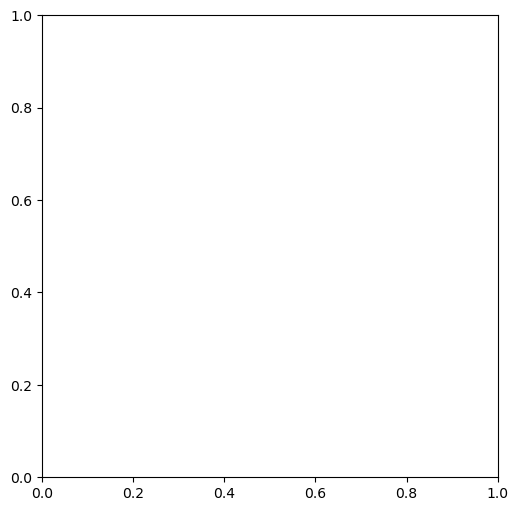

In [6]:
# --- multi-panel plot for all vars
# define number of rows and cols based on unique vars
unique_vars = df["var"].unique()
num_cols = 3
num_rows = (len(unique_vars) + num_cols - 1) // num_cols

# Create a new figure and set up a GridSpec
fig = plt.figure(figsize=(20, 6))  # Adjust figsize as needed
gs = GridSpec(num_rows, num_cols, figure=fig)

for i, var in enumerate(unique_vars):
    # get the row and column indices for the current subplot
    row = i // num_cols
    col = i % num_cols

    # Create a subplot within the GridSpec
    ax = fig.add_subplot(gs[row, col])

    # Filter the DataFrame for the current var
    var_df = df[df["var"] == var]

    # Group the DataFrame by the 'time' column
    grouped = var_df.groupby("time")

    # Create a colormap
    cmap = plt.get_cmap("magma")  # Get the colormap
    cmap = cmap.reversed()  # flip colormap
    # -- no log normalization
    norm = plt.Normalize(
        var_df["time"].min(), var_df["time"].max()
    )  # Normalize time values for colormap
    # -- log normalization WIP
    # log_time = np.log(df['time'])
    # norm = plt.Normalize(log_time.min(), log_time.max())  # Normalize time values for colormap

    # Create a plot for each time step
    for time, group in grouped:
        color = cmap(norm(time))  # Map time to color using Viridis colormap
        ax.plot(group["py"], group["z"], color=color, label=None)
        ax.plot(group["gt"], group["z"], color=color, linestyle="dashed", label=None)
        ax.plot(
            group["fe2o2"], group["z"], color=color, linestyle="dashdot", label=None
        )

    # Add labels and a legend
    ax.set_xlabel(var)
    ax.set_ylabel("depth")

    # Create a colorbar based on the Viridis colormap
    # sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    # sm.set_array([])  # Set an empty array for the colorbar data
    # cbar = plt.colorbar(sm, label='Time (s)', ax=plt.gca())

    # Add a legend to the last subplot
    if i == len(unique_vars) - 1:
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])  # Set an empty array for the colorbar data
        cbar = plt.colorbar(sm, label="Time (yr)", ax=plt.gca())

    # flip y-axis
    plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()